In [1]:
"""
Author: Ngo Van Uc
Date: 01/11/2024
Contact: ngovanuc.1508@gmail.com
"""

'\nAuthor: Ngo Van Uc\nDate: 01/11/2024\nContact: ngovanuc.1508@gmail.com\n'

***Note quan trọng:***

Trong bài số 3, chúng ta đã làm quen một dự án nhỏ, đó là sử dụng Linear Regression để dự đoán giá nhà. Cụ thể chúng ta đã:
- Thực hiện đọc dữ liệu HousePrice
- Lựa chọn các đặc trưng đơn giản (liên tưởng thực tế để chọn, trên thực tế nhà có diện tích lớn thì giá nhà lớn)
- Tiền xử lí đơn giản: như loại bỏ giá trị Nan, chia dữ liệu thành x, y. Rồi chia thành dữ liệu train - test theo tỉ lệ tùy chỉnh
- Chúng ta đã lựa chọn model và huấn luyện
- Sau đó thực hiện đánh giá hiệu suất mô hình. Các hàm mất mát được dùng để đánh giá bao gồm: mean_square_error, mean_absolute_error và r2_score. Trên thực tế có rất nhiều hàm mất mát được dùng để đánh giá các mô hình học máy đơn giản. Hãy tìm hiểu công thức toán, ưu và nhược điểm của mỗi loại và ghi nhớ nó. Rất hữu ích đấy!

Trong bài này, chúng ta cũng sẽ tiếp tục thực hiện lại dự án này, tuy nhiên quy mô sẽ lớn hơn và toàn diện hơn. Cụ thể, trong dự án lần này chúng ta sẽ:
- Đồng thời áp dụng nhiều thuật toán khác nhau (cũng là dự đoán Regression) để so sánh hiệu suất của các mô hình này.
- Mở rộng cách trực quan hóa dữ liệu và cách để hiểu về dữ liệu. Cụ thể:
    + Biết cách trực quan hóa dữ liệu
    + Biết tìm giá trị trung bình, trung vị, hiểu sự phân bố của các giá trị trong mỗi đặc trưng
    + Vẽ (trực quan hóa) những thuộc tính quan trọng
    + Vẽ biểu đồ (ma trận tương quan) biểu thị sự tương quan giữa các đặc trưng trong dữ liệu
    + Tìm hiểu outlier
- Tìm hiểu cách tiền xử lí dữ liệu, cụ thể chúng ta sẽ tìm hiểu cách:
    + Xử lí dữ liệu Nan/Missing
    + Đối với dữ liệu không phải là số thì xử lí như thế nào...
    + Loại bỏ đi những cột không cần thiết (dựa vào ma trận tương quan như đã nêu ở trên)
    + Chia dữ liệu từ dataframe, thành x, y. Rồi chia thành train - test theo tỉ lệ tùy chỉnh
- Xây dựng model và huấn luyện
- Thực hiện predict trên toàn bộ dữ liệu kiểm thử
- Đánh giá hiệu suất của mô hình trên toàn bộ dữ liệu kiểm thử (từ kết quả được predict) rồi sau đó so sánh hiệu suất xem mô hình nào tốt.
- Dự đoán một mẫu mới tùy chọn/chỉ định
- Đúc kết vấn đề còn phát sinh

## Import libraries

1. Lựa chọn model
    - Đây là bài toán Regression (đến đây phải phân biệt được bài toán Regression và Classification rồi)
    - Oke, hãy list ra một vài mô hình dành cho hồi quy xem nào:
        + Linear Regression
        + KNN (cho hồi quy)
        + Decission Tree (cho hồi quy)
        + Random Forest (cho hồi quy)
        + Gradiant Boosting Machine
    - Trên thực tế có rất nhiều mô hình dùng để giải quyết bài toán Regression. Mỗi mô hình sẽ có ưu nhược điểm riêng.

2. Lựa chọn hàm tính mất mát (error)
    - Lựa chọn hàm mất mát phù hợp với bài toán Regression
    - các hàm mất mát có thể dùng trong bài toán này:
        + mean_square_error
        + mean_absolute_error
        + r2_score
    - Hãy thử tìm hiểu công thức toán và đọc tài liệu về các hàm mất mát trên

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Preprocessing dataset

In [ ]:
data_path = "E:/LEARNING/Machine_learning/Data/HousePrice/output.csv"
df = pd.read_csv(data_path)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


***Nhận xét sơ bộ các cột của dataset***

- date: Đây là ngày thu thập thông tin, kéo xuống thấy giống nhau cả => Cột này không mang nhiều ý nghĩa và có thể loại bỏ
- price: Mục tiêu của bài toán là dự đoán giá nhà => Hiển nhiên nó là đầu ra (output) mà ta đang hướng đến
- bedrooms: Số lượng phòng ngủ. Trên thực tế thì nhà có nhiều phòng ngủ có thể đắt hơn => thông tin quan trọng
- bathrooms: tương tự bedrooms
- sqft_living: Là diện tích phòng khách chăng?
- sqft_lot: Tổng diện tích căn nhà
- floors: Số tầng. Trên thực tế nhà nhiều tầng thì càng đắt. Số tầng 1.5 có lẽ là gác xếp gì đó...
- waterfront: 
- view: Nhà có nhiều view thì càng được ưa chuông, và do đó giá có thể cao hơn => thông tin quan trọng
- condition: Có thể là tình trạng tốt hoặc xấu của nhà => thông tin quan trọng
- sqft_above:
- sqft_basement:
- yr_built: Năm xây dựng nhà => thể hiện mức độ mới/cũ của nhà => Thông tin quan trọng
- yr_renovated: Năm cải tạo => Nhà qua cải tạo thì có thể đắt hơn nếu chưa được cải tạo trọng cùng thời điểm?
- street: Nhà nằm trên đường sầm uất hơn thì sẽ có giá cao hơn. Ví dụ như nhà ở đường XVNT thì có giá cao hơn nếu so sánh với đường ít người biết đến.
- city: Mức độ phát triển của thành phố cũng ảnh hưởng đến giá nhà => Thông tin quan trọng
- statezip:
- country: Toàn bộ data toàn là nhà của USA => cột này ko mang nhiều thông tin quan trọng

Quan nhận xét sơ bộ về dataset, chúng ta có thể rút ra được những thông tin sơ bộ sau (Mỗi dataset sẽ có bản mô tả, cần dựa vào đó để hiểu bước đầu. Hoặc có thể tự phân tích như trên):
- Các cột không mang thông tin quan trọng hoặc ít quan trọng có thể là: date, statezip, country
- Các cột có kiểu dữ liệu là text: street, city => Cần đổi về dạng số vì mô hình ko thể hiểu chữ
- Các cột cần lưu ý để xử lý lại: Các cột data là text và các cột...

***Lưu ý:***
- Chúng ta quyết định bỏ đi các cột: data, waterfront, statezip, country vì chúng không mang thông tin quan trọng.
- Cần thực hiện tính toán trung bình, trung bị, vẽ biểu đồ phân phối, ma trận tương quan, xác định outlier để có thể đưa ra kết luận chắc chắn hơn

## Exploring dataset

Để hiểu hơn về dataset, chúng ta sẽ:
- Xem mô tả thống kê
- Vẽ (trực quan hóa) dữ liệu
- Xác định outlier
- Loại bỏ Nan hoặc missing
- Vẽ ma trận tương quan

In [ ]:
df.columns

class person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        p1 = person("John", 36)
        print(p1.name)
        print(p1.age)   
    

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
drop_columns = ['date', 'waterfront', 'statezip', 'country']
df = df.drop(columns=drop_columns, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond


In [ ]:
# Xem thống kê mô tả cho dataset
df.describe()

# Ta thấy:
# - Các cột dữ liệu là text không thể tính toán được => cần phải chuyển sang dạng số
# - count: Dữ liệu của ta có 4.600 dòng

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


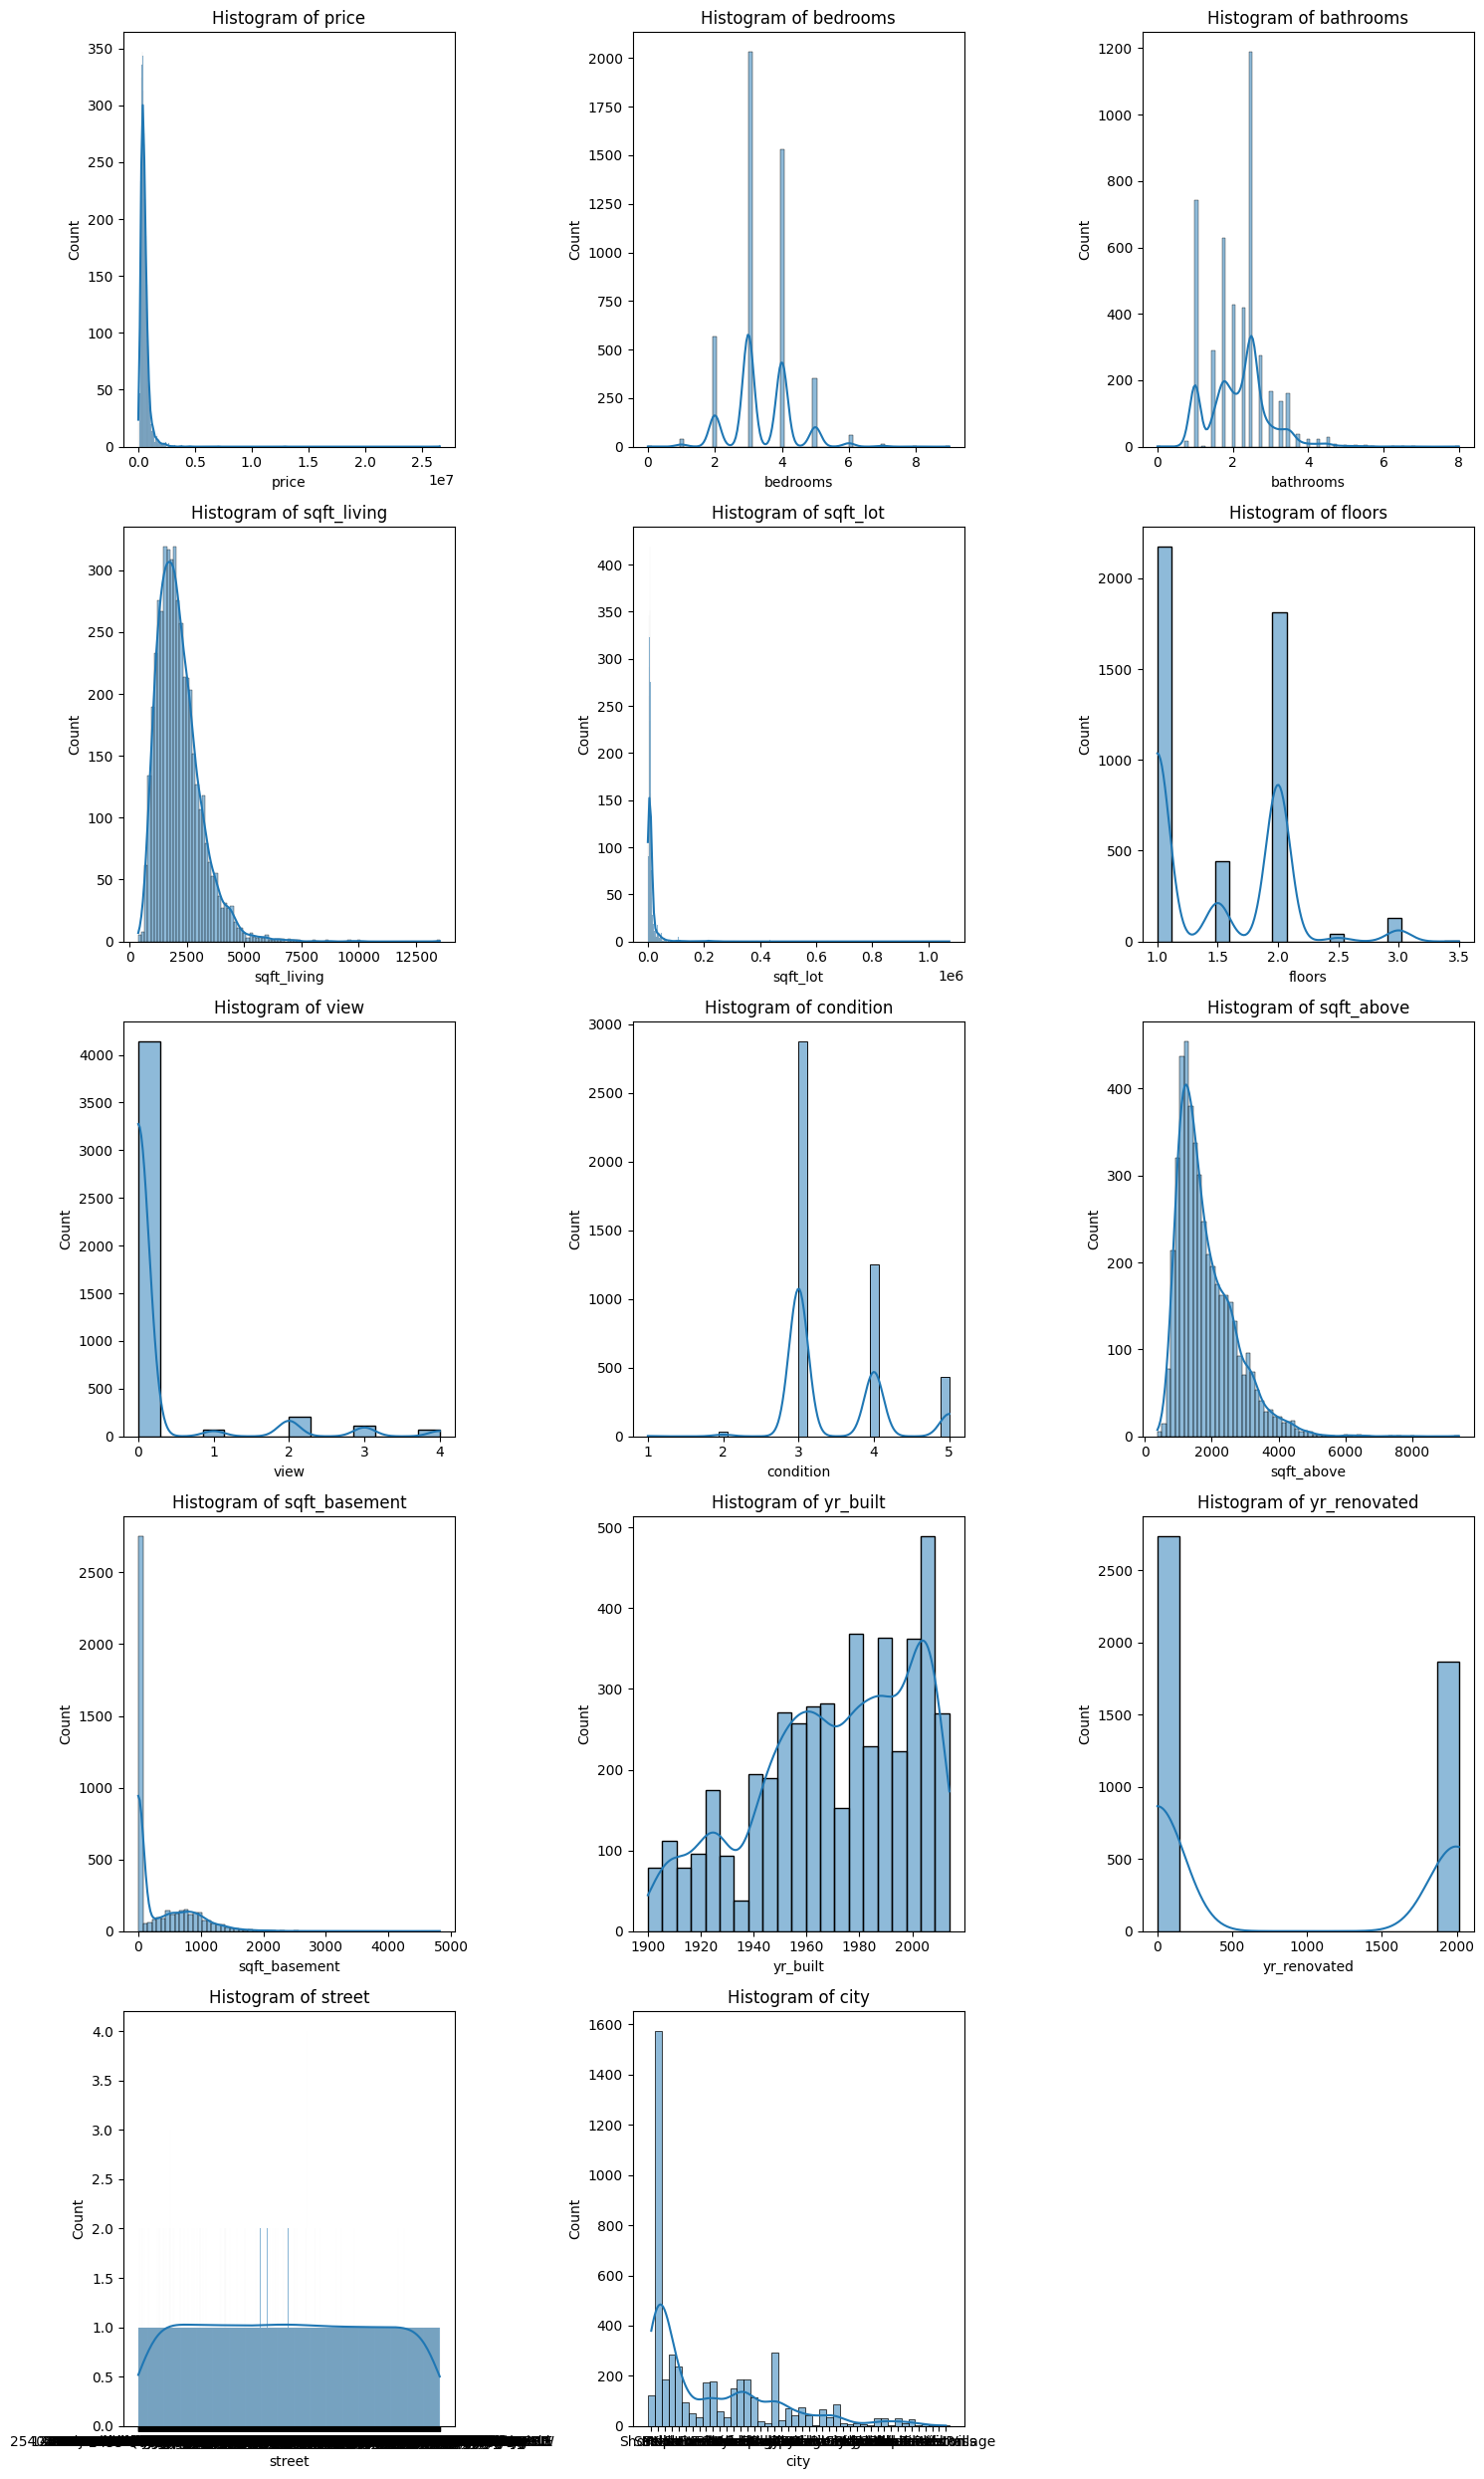

In [14]:
# draw histogram of dataset
features = [i for i in df.columns]
# print(features)

num_vars = len(features)
num_cols = 3
num_rows = (num_vars + num_cols -1 ) // num_cols

plt.figure(figsize=(15, 5*num_rows))

for i, var in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(x=var, data=df, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Preprocessing data

Chúng ta sẽ:
- Loại bỏ đi các dòng dữ liệu Nan
- Thay thế dữ liệu dạng text thành văn bản. Quy tắc đếm số lượng duy nhất của cột đó (giả sử có n) và ta sẽ gán chạy từ 0 đến (n-1) tương ứng. Giả sử có 7 thành phố thì ta sẽ gán từ 0 đến 6 tương ứng với 7 thành phố đó. và tương tự cho các cột khác.
- Bỏ đi các cột không cần thiết (đã làm ở trên), và bỏ đi cột street

In [17]:
# Loại bỏ đi các giá trị nan
df = df.dropna()
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond


In [18]:
# Bỏ đi cột street
df = df.drop(columns=['street'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond


In [31]:
# Thay thế giá trị cho cột city
city = df['city']
city = city.drop_duplicates().reset_index(drop=True)
# print(city)
print(len(city))
# Có tổng 44 thành phố, gán lần lượt từ 0 đến 43

44


In [32]:
dict_city = dict()
for idx in range(len(city)):
    # Lấy tên thành phố và gán cho nó là idx tương ứng vào 
    c = city[idx]
    dict_city[c] = idx

print(dict_city)

{'Shoreline': 0, 'Seattle': 1, 'Kent': 2, 'Bellevue': 3, 'Redmond': 4, 'Maple Valley': 5, 'North Bend': 6, 'Lake Forest Park': 7, 'Sammamish': 8, 'Auburn': 9, 'Des Moines': 10, 'Bothell': 11, 'Federal Way': 12, 'Kirkland': 13, 'Issaquah': 14, 'Woodinville': 15, 'Normandy Park': 16, 'Fall City': 17, 'Renton': 18, 'Carnation': 19, 'Snoqualmie': 20, 'Duvall': 21, 'Burien': 22, 'Covington': 23, 'Inglewood-Finn Hill': 24, 'Kenmore': 25, 'Newcastle': 26, 'Mercer Island': 27, 'Black Diamond': 28, 'Ravensdale': 29, 'Clyde Hill': 30, 'Algona': 31, 'Skykomish': 32, 'Tukwila': 33, 'Vashon': 34, 'Yarrow Point': 35, 'SeaTac': 36, 'Medina': 37, 'Enumclaw': 38, 'Snoqualmie Pass': 39, 'Pacific': 40, 'Beaux Arts Village': 41, 'Preston': 42, 'Milton': 43}


In [34]:
for idx in range(len(df)):
    cty = df.loc[idx, 'city']
    df.loc[idx, 'city'] = dict_city[cty]

# Các city đã được chuyển sang dạng số
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,4


In [35]:
# Đến đây có vẻ như data oke rồi đó. Chia nó thành các tập training và testing
# Lấy hết tất cả các dòng, lấy từ cột 1 đến hết
x = df.iloc[:, 1:]

# Lấy hết tất cả các dòng, lấy mỗi cột 0
y = df.iloc[:, 0:1]

In [36]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,0
1,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,1
2,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,2
3,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,3
4,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,4


In [37]:
y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Xây dựng model và huấn luyện

In [43]:
# Build model
Linear_Regression_model = LinearRegression()
KNN_model = KNeighborsRegressor()
Decision_Tree_model = DecisionTreeRegressor()

# Training model
Linear_Regression_model.fit(x_train, y_train)
KNN_model.fit(x_train, y_train)
Decision_Tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

## Predict trên toàn bộ dữ liệu kiểm thử

Hướng dẫn:
- Dùng hàm predict để thực hiện predict trên toàn bộ dữ liệu kiểm thử
- Sử dụng hàm mất mát để tính toán sự mất mát của các mô hình dựa trên kết quả predict được và y_test
- Thử so sánh đối chiếu xem chênh lệnh kết quả nhiều không